# Classification Methods on Landsat Imagery
_Using sklearn to implement classification methods on a per pixel basis_

### Classification Methods:
1. Support Vector Classifier
2. K-Nearest Neighbor Classifier
3. Decision Tree Classifier

In [1]:
# Import the necessary libaries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets

## Preprocessing the data
- Read the test and train data into a dataframe
- Split the data into features (independent variables) and label (dependent-variable)

In [2]:
# perform both classifiers on the band values from the raster image
# read in both training and testing data
bandsTrain_df = pd.read_csv('./data/training_classification.csv')
bandsTest_df = pd.read_csv('./data/testing_classification_clean.csv')
bandsTrain_df

,B1,B2,B3,B4,B5,B6,B7,landcover
0,763,830,949,960,1141,1271,1156,0
1,1803,2175,2678,2874,2983,4869,5132,0
2,267,325,454,431,1315,949,775,0
3,316,429,490,527,735,717,681,0
4,614,679,858,899,1694,1338,1093,0
...,...,...,...,...,...,...,...,...
95,304,359,695,550,3400,2447,1233,3
96,358,361,772,361,5525,2231,969,3
97,300,323,675,349,4280,1952,848,3
98,352,406,597,671,2244,2893,1894,3


In [3]:
# view summary statistics of each band (column)
bandsTrain_df.describe()

,B1,B2,B3,B4,B5,B6,B7,landcover
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,366.150000,409.330000,611.610000,515.710000,2569.090000,1490.340000,853.270000,1.500000
std,287.441004,350.258809,437.698409,531.573789,1761.389902,1000.908711,741.807931,1.123666
min,89.000000,120.000000,145.000000,86.000000,122.000000,24.000000,9.000000,0.000000
25%,209.750000,208.500000,316.000000,195.500000,614.000000,535.500000,411.750000,0.750000
50%,260.000000,272.000000,444.500000,266.500000,3056.000000,1723.000000,811.000000,1.500000
75%,370.250000,423.000000,737.250000,626.000000,4125.500000,2167.250000,1142.500000,2.250000
max,1803.000000,2175.000000,2678.000000,2916.000000,5525.000000,4869.000000,5132.000000,3.000000


In [4]:
# Prepare the data into seperate variables
train_data = bandsTrain_df.to_numpy() # convert entire dataframe to a matrix
X1_train = train_data[:, :-1] # all columns but the last
y1_train = train_data[:, -1].astype(int) # expected to be from 0 to n_classes - 1 (in this case, 0, 1, 2 classes for different flowers)

test_data = bandsTest_df.to_numpy()
X1_test = test_data[:, :-1] # all columns but the last
y1_test = test_data[:, -1].astype(int) # expected to be from 0 to n_classes - 1 (in this case, 0, 1, 2 classes for different flowers)


## Training and Testing the Classification Models
- Fit the models to the training data (this is called training or fitting the model)
- Make predictions on the testing data
- View classification results (accuracy metrics)

### Support Vector Classification (SVC) and K Nearest Neighbors (KNN) Classification

In [5]:
# Initialize the models
svcBandModel = SVC()
# Remember, KNN model requires you to specify n_neighbors,
# the number of points the classifier will look at to determine what class a new point belongs to
KNNBandsModel = KNeighborsClassifier(n_neighbors=4)

In [6]:
# Fit the models
svcBandModel.fit(X1_train, y1_train)
KNNBandsModel.fit(X1_train, y1_train)

KNeighborsClassifier(n_neighbors=4)

In [7]:
# Make predictions on the test data
svcBandPred = svcBandModel.predict(X1_test)
KNNBandPred = KNNBandsModel.predict(X1_test)

In [8]:
# Accuracy score is the simplest way to evaluate
print(accuracy_score(svcBandPred, y1_test))
print(accuracy_score(KNNBandPred, y1_test))
# But Confusion Matrix and Classification Report give more details about performance
print(confusion_matrix(svcBandPred, y1_test))
print(classification_report(KNNBandPred, y1_test))

0.9333333333333333
0.9833333333333333
[[14  0  0  0]
 [ 0 15  0  0]
 [ 1  0 13  1]
 [ 0  0  2 14]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        15
           2       1.00      0.94      0.97        16
           3       0.93      1.00      0.97        14

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



## Predicting class of every pixel in the image
Use the classification models to classify the entire image

In [9]:
# First, get the file path and file name for red, green, and blue bands
# use the glob module to get landsat bands 1-7
# import glob
import rasterio

# for fn in glob.glob('./data/saratoga_08052019_image/*B[1-7].TIF'): 
#     print(fn[-6:-4])

bands_fn = './data/landsatToDrive.tif'
bands_src = rasterio.open(bands_fn, driver="GTiff")


# Use rasterio.open to open each image and read
band1 = bands_src.read(1)
band2 = bands_src.read(2)
band3 = bands_src.read(3)
band4 = bands_src.read(4)
band5 = bands_src.read(5)
band6 = bands_src.read(6)
band7 = bands_src.read(7)

In [10]:
# Remember the shape of the input vector for prediction
X1_train.shape

(100, 7)

In [11]:
# Stack all arrays into one numpy array to use for analysis
band_stack = np.dstack((band1, band2, band3, band4, band5, band6, band7))
band_stack.shape

(7835, 7589, 7)

In [ ]:
## Support Vector Classifier prediction of Landsat8 Image

# initialize an array to add labeled pixels
svc_result = np.zeros(band_stack[:, :, 0].shape)
for j in range(band_stack.shape[0]): # for each row
    print(j)
    for k in range(band_stack.shape[1]): # for each col
        # for all band values (each raster value) in a pixel
        b_array = band_stack[j,k,:]
#         print(b_array.shape)
        if (np.any(b_array)):
            # If all b_array values are 0, then:
            # add band values to list to pass to classifier prediction

            b_array = b_array.reshape(1, -1)
#             print(b_array)
            pred = svcBandModel.predict(b_array)
#             print(pred)

#             # add predicted label value to cell
            svc_result[j,k] = pred
        else:
            svc_result[j,k] = np.nan

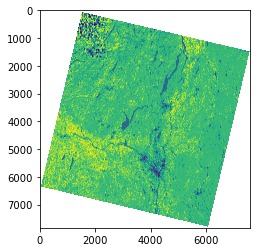

In [32]:
plt.imshow(svc_result)

In [30]:
##  Quick sanity check for SVC prediction
a = np.array([478, 439, 606, 407, 4866, 2487, 1079]).reshape(1,-1) # band values for some pixel
print(a)
print(svcBandModel.predict(a))

[[ 478  439  606  407 4866 2487 1079]]
[3]


In [31]:
print(band5.mean())

2516.870082542302


In [43]:
# Saving SVC classification raster

# Open a new raster file, and initialize with the same parameters from the L8 scene
# (use any band from the scene to get the parameters)
# the following are the major parameters used to write a new raster file
svc_raster = rasterio.open('./data/L8_wrs1430_classSVC.tif', 'w', driver='GTiff',
                         width=bands_src.width, height = bands_src.height,
                         count= 1,
                         crs=bands_src.crs,
                         transform=bands_src.transform,
                         dtype='float64')

# Write each band to the raster file
svc_raster.write(svc_result, 1) # write the classification numpy to band

# Close the raster file
svc_raster.close()

In [ ]:
## KNN Classifier of Landsat8 Image

# initialize an array to add labeled pixels
knn_result = np.zeros(band_stack[:, :, 0].shape)
for j in range(band_stack.shape[0]): # for each row
    print(j)
    for k in range(band_stack.shape[1]): # for each col
        # for all band values (each raster value) in a pixel
        b_array = band_stack[j,k,:]
#         print(b_array.shape)
        if (np.any(b_array)):
            # If all b_array values are 0, then:
            # add band values to list to pass to classifier prediction

            b_array = b_array.reshape(1, -1)
#             print(b_array)
            pred = KNNBandsModel.predict(b_array)
#             print(pred)

#             # add predicted label value to cell
            knn_result[j,k] = pred
        else:
            knn_result[j,k] = np.nan

In [ ]:
# Saving KNN classification raster

# Open a new raster file, and initialize with the same parameters from the L8 scene
# (use any band from the scene to get the parameters)
# the following are the major parameters used to write a new raster file
svc_raster = rasterio.open('./data/L8_wrs1430_classKNN.tif', 'w', driver='GTiff',
                         width=bands_src.width, height = bands_src.height,
                         count= 1,
                         crs=bands_src.crs,
                         transform=bands_src.transform,
                         dtype='float64')

# Write each band to the raster file
svc_raster.write(knn_result, 1) # write the classification numpy to band

# Close the raster file
svc_raster.close()

### Decision Tree Classification

In [12]:
from sklearn.tree import DecisionTreeClassifier
dtClassifier = DecisionTreeClassifier()
dtClassifier.fit(X1_train, y1_train)

DecisionTreeClassifier()

In [13]:
# Quick sanity check for Decision Tree Classifier prediction
dtClassifier.predict(np.array([478, 439, 606, 407, 4866, 2487, 1079]).reshape(1,-1))

array([3])

In [16]:
# Make predictions on the test data
dtBandPred = dtClassifier.predict(X1_test)

In [20]:
# Accuracy score is the simplest way to evaluate
# print(accuracy_score(svcBandPred, y1_test))
# print(accuracy_score(KNNBandPred, y1_test))
print(accuracy_score(dtBandPred, y1_test))
# But Confusion Matrix and Classification Report give more details about performance
# print(confusion_matrix(svcBandPred, y1_test))
# print(classification_report(KNNBandPred, y1_test))
print(classification_report(dtBandPred, y1_test))
# print(confusion_matrix(dtBandPred, y1_test)

0.9333333333333333
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.94      0.97        16
           2       1.00      0.83      0.91        18
           3       0.80      1.00      0.89        12

    accuracy                           0.93        60
   macro avg       0.93      0.94      0.93        60
weighted avg       0.94      0.93      0.93        60



In [ ]:
## Decision Tree Classifier of Landsat8 Image

# initialize an array to add labeled pixels
dt_result = np.zeros(band_stack[:, :, 0].shape)
for j in range(band_stack.shape[0]): # for each row
    print(j)
    for k in range(band_stack.shape[1]): # for each col
        # for all band values (each raster value) in a pixel
        b_array = band_stack[j,k,:]
#         print(b_array.shape)
        if (np.any(b_array)):
            # If all b_array values are 0, then:
            # add band values to list to pass to classifier prediction

            b_array = b_array.reshape(1, -1)
#             print(b_array)
            pred = dtClassifier.predict(b_array)
#             print(pred)

#             # add predicted label value to cell
            dt_result[j,k] = pred
        else:
            dt_result[j,k] = np.nan

In [22]:
# Saving Decision Tree classification raster

# Open a new raster file, and initialize with the same parameters from the L8 scene
# (use any band from the scene to get the parameters)
# the following are the major parameters used to write a new raster file
svc_raster = rasterio.open('./data/L8_wrs1430_dtClass.tif', 'w', driver='GTiff',
                         width=bands_src.width, height = bands_src.height,
                         count= 1,
                         crs=bands_src.crs,
                         transform=bands_src.transform,
                         dtype='float64')

# Write each band to the raster file
svc_raster.write(dt_result, 1) # write the classification numpy to band

# Close the raster file
svc_raster.close()